In [ ]:
## importing necessary libraries

import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, auc,roc_curve ,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import re
import matplotlib.pyplot as plt


In [ ]:
#from google.colab import drive
#drive.mount('/mnt/drive')

In [ ]:
#import pandas as pd
#mydata = pd.read_csv('/mnt/drive/MyDrive/Colab Notebooks/Subscribers.csv')
#mydata.shape

In [ ]:
## reading the data sets

In [ ]:
data=pd.read_csv("default_data.csv")

In [ ]:
branch=pd.read_csv ("branch.csv")

In [ ]:
manufacturer =pd.read_csv ("manufacturer.csv")

In [ ]:
state =pd.read_csv ("state.csv")

In [ ]:
## now preprocessing of data

In [ ]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [ ]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [ ]:
## Applying regular expressions

In [ ]:
[re.sub(r'\W+','-',i.lower())
for i in data.columns ]

['uniqueid',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'current_pincode_id',
 'date-of-birth',
 'employment-type',
 'disbursaldate',
 'state_id',
 'employee_code_id',
 'mobileno_avl_flag',
 'aadhar_flag',
 'pan_flag',
 'voterid_flag',
 'driving_flag',
 'passport_flag',
 'perform_cns-score',
 'perform_cns-score-description',
 'pri-no-of-accts',
 'pri-active-accts',
 'pri-overdue-accts',
 'pri-current-balance',
 'pri-sanctioned-amount',
 'pri-disbursed-amount',
 'sec-no-of-accts',
 'sec-active-accts',
 'sec-overdue-accts',
 'sec-current-balance',
 'sec-sanctioned-amount',
 'sec-disbursed-amount',
 'primary-instal-amt',
 'sec-instal-amt',
 'new-accts-in-last-six-months',
 'delinquent-accts-in-last-six-months',
 'average-acct-age',
 'credit-history-length',
 'no-of_inquiries',
 'loan_default']

In [ ]:
data = data.rename(
    columns = {old: re.sub(r'\W+','_',old).lower()
   for old in data.columns}
)

In [ ]:
data.columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'disbursaldate', 'state_id', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default'],
      dtype='object')

In [ ]:
data.columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'disbursaldate', 'state_id', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default'],
      dtype='object')

In [ ]:
data.uniqueid

0         420825
1         537409
2         417566
3         624493
4         539055
           ...  
233149    626432
233150    606141
233151    613658
233152    548084
233153    630213
Name: uniqueid, Length: 233154, dtype: int64

In [ ]:
 data = data.merge(branch, on ='branch_id', how='left')

In [ ]:
data = data.merge(manufacturer, on ='manufacturer_id', how='left')

In [ ]:
data = data.merge(state, on ='state_id', how='left')

In [ ]:
data.columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'disbursaldate', 'state_id', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'average_acct_age', 'credit_history_length', 'no_of_inquiries',
       'loan_default', 'event_count_branch', 'event_count_manufacturer',
       'event_state'],
      dtype='object')

In [ ]:
data.shape

(233154, 44)

In [ ]:
data.dtypes

uniqueid                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
current_pincode_id                       int64
date_of_birth                           object
employment_type                         object
disbursaldate                           object
state_id                                 int64
employee_code_id                         int64
mobileno_avl_flag                        int64
aadhar_flag                              int64
pan_flag                                 int64
voterid_flag                             int64
driving_flag                             int64
passport_flag                            int64
perform_cns_score                        int64
perform_cns_score_description           object
pri_no_of_acc

In [ ]:
data.describe(include='all',
              datetime_is_numeric=True)

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,...,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,event_count_branch,event_count_manufacturer,event_state
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154,225493,...,2.331540e+05,233154.000000,233154.000000,233154,233154,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15433,2,...,NaN,NaN,NaN,192,294,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-01-1988,Self employed,...,NaN,NaN,NaN,0yrs 0mon,0yrs 0mon,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2173,127635,...,NaN,NaN,NaN,119373,119127,NaN,NaN,NaN,NaN,NaN
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,NaN,NaN,...,3.232684e+02,0.381833,0.097481,NaN,NaN,0.206615,0.322439,1000.269328,15163.381203,4292.148413
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,NaN,NaN,...,1.555369e+04,0.955107,0.384439,NaN,NaN,0.706498,0.467411,866.707737,8004.082565,2703.712160
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,NaN,NaN,...,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,0.000000,3.000000,0.000000,18.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,NaN,NaN,...,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,0.000000,253.000000,9786.000000,2036.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,NaN,NaN,...,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,0.000000,900.000000,12149.000000,2923.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,NaN,NaN,...,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,1.000000,1506.000000,22987.000000,7311.000000


In [ ]:
type(np.nan)

float

In [ ]:
data.isnull().sum()

uniqueid                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
current_pincode_id                        0
date_of_birth                             0
employment_type                        7661
disbursaldate                             0
state_id                                  0
employee_code_id                          0
mobileno_avl_flag                         0
aadhar_flag                               0
pan_flag                                  0
voterid_flag                              0
driving_flag                              0
passport_flag                             0
perform_cns_score                         0
perform_cns_score_description             0
pri_no_of_accts                           0
pri_active_accts                

In [ ]:
data.loan_default.value_counts()

0    157976
1     75178
Name: loan_default, dtype: int64

In [ ]:
data.loan_default.value_counts(normalize=True)

0    0.677561
1    0.322439
Name: loan_default, dtype: float64

In [ ]:


##removing noisy data
## data preprocessing starts here b

In [ ]:
id_cols = set(data.columns[[item.endswith('id') for item in data.columns]])

In [ ]:
target = 'loan_default'

In [ ]:
id_cols.add(target)

In [ ]:
id_cols

{'branch_id',
 'current_pincode_id',
 'employee_code_id',
 'loan_default',
 'manufacturer_id',
 'state_id',
 'supplier_id',
 'uniqueid'}

In [ ]:
all_columns = set(data.columns)

In [ ]:
remaining_cols = list(all_columns.difference(id_cols))

In [ ]:
remaining_cols

['ltv',
 'pri_current_balance',
 'sec_disbursed_amount',
 'event_count_branch',
 'mobileno_avl_flag',
 'perform_cns_score',
 'primary_instal_amt',
 'date_of_birth',
 'sec_active_accts',
 'credit_history_length',
 'sec_no_of_accts',
 'pri_no_of_accts',
 'asset_cost',
 'employment_type',
 'pri_disbursed_amount',
 'new_accts_in_last_six_months',
 'pri_overdue_accts',
 'sec_overdue_accts',
 'disbursaldate',
 'voterid_flag',
 'average_acct_age',
 'pri_active_accts',
 'delinquent_accts_in_last_six_months',
 'aadhar_flag',
 'driving_flag',
 'sec_sanctioned_amount',
 'sec_current_balance',
 'no_of_inquiries',
 'event_state',
 'pri_sanctioned_amount',
 'pan_flag',
 'disbursed_amount',
 'passport_flag',
 'sec_instal_amt',
 'event_count_manufacturer',
 'perform_cns_score_description']

In [ ]:
all_columns - set(id_cols)

{'aadhar_flag',
 'asset_cost',
 'average_acct_age',
 'credit_history_length',
 'date_of_birth',
 'delinquent_accts_in_last_six_months',
 'disbursaldate',
 'disbursed_amount',
 'driving_flag',
 'employment_type',
 'event_count_branch',
 'event_count_manufacturer',
 'event_state',
 'ltv',
 'mobileno_avl_flag',
 'new_accts_in_last_six_months',
 'no_of_inquiries',
 'pan_flag',
 'passport_flag',
 'perform_cns_score',
 'perform_cns_score_description',
 'pri_active_accts',
 'pri_current_balance',
 'pri_disbursed_amount',
 'pri_no_of_accts',
 'pri_overdue_accts',
 'pri_sanctioned_amount',
 'primary_instal_amt',
 'sec_active_accts',
 'sec_current_balance',
 'sec_disbursed_amount',
 'sec_instal_amt',
 'sec_no_of_accts',
 'sec_overdue_accts',
 'sec_sanctioned_amount',
 'voterid_flag'}

In [ ]:
data.shape

(233154, 44)

In [ ]:
data.loc[: , remaining_cols].head()

,ltv,pri_current_balance,sec_disbursed_amount,event_count_branch,mobileno_avl_flag,perform_cns_score,primary_instal_amt,date_of_birth,sec_active_accts,credit_history_length,...,sec_current_balance,no_of_inquiries,event_state,pri_sanctioned_amount,pan_flag,disbursed_amount,passport_flag,sec_instal_amt,event_count_manufacturer,perform_cns_score_description
0,89.55,0,0,2430,1,0,0,01-01-1984,0,0yrs 0mon,...,0,0,6058,0,0,50578,0,0,12149,No Bureau History Available
1,73.23,27600,0,2430,1,598,1991,31-07-1985,0,1yrs 11mon,...,0,0,6058,50200,0,47145,0,0,12149,Medium Risk
2,89.63,0,0,2430,1,0,0,24-08-1985,0,0yrs 0mon,...,0,0,6058,0,0,53278,0,0,12149,No Bureau History Available
3,88.48,0,0,2430,1,305,31,30-12-1993,0,1yrs 3mon,...,0,1,6058,0,0,57513,0,0,12149,Very High Risk
4,88.39,0,0,2430,1,0,0,09-12-1977,0,0yrs 0mon,...,0,1,6058,0,0,52378,0,0,12149,No Bureau History Available


In [ ]:
data.date_of_birth.head()

0    01-01-1984
1    31-07-1985
2    24-08-1985
3    30-12-1993
4    09-12-1977
Name: date_of_birth, dtype: object

In [ ]:
data = data.assign(
    **{
        'date_of_birth' : pd.to_datetime(data['date_of_birth'],format= '%d-%m-%Y'),
        'disbursaldate' : pd.to_datetime(data['disbursaldate'],format= '%d-%m-%Y'),
        'age' : lambda x: (x.disbursaldate - x.date_of_birth).dt.days/365.25
    }
)

In [ ]:

data.loc[: , ['date_of_birth','disbursaldate','age']].head()

,date_of_birth,disbursaldate,age
0,1984-01-01,2018-08-03,34.587269
1,1985-07-31,2018-09-26,33.155373
2,1985-08-24,2018-08-01,32.936345
3,1993-12-30,2018-10-26,24.821355
4,1977-12-09,2018-09-26,40.796715


In [ ]:

object_cols = data.loc[: , remaining_cols].select_dtypes('object').columns

In [ ]:
object_cols

Index(['credit_history_length', 'employment_type', 'average_acct_age',
       'perform_cns_score_description'],
      dtype='object')

In [ ]:
#The original data in this column appears to be in a format like "X yrs Y mon" where X is the number of years and Y is the number of months.
#The code cleans and transforms this information into a unified representation of time in years.

In [ ]:
(
data.head().credit_history_length.str.
replace('yrs|mon', '', regex=True).
str.
split(" ",expand=True).
rename(columns={0:'year', 1: 'month'}).
pipe(lambda x: x.year.astype('int') + x.month.astype('int')/12)
)

0    0.000000
1    1.916667
2    0.000000
3    1.250000
4    0.000000
dtype: float64

In [ ]:
#def split_yr_mon(x):
  #yrs = (x.str.replace('yrs|mon', '', regex=True).str.
  #split('' '',expand=True).rename(columns = {0:'year',1:month}).
  #pipe( lambda x: x.year.astype('int') + x.month.astype('int')/12))
 # return yrs

In [ ]:
#def split_yr_mon(x):
 #   yrs = (x.str.replace('yrs|mon', '', regex=True) # Remove 'yrs' or 'mon' from strings
 #          .str.split(' ', expand=True)              # Split strings into 'year' and 'month' columns
  #         .rename(columns={0: 'year', 1: 'month'})    # Rename columns resulting from split
   #        .pipe(lambda x: x['year'].astype('int') + x['month'].astype('int') / 12))
   # return yrs


In [ ]:
#def split_yr_mon(x):
 #   def convert_to_years(entry):
  #      parts = entry.replace('yrs', '').replace('mon', '').split()
   #     years = int(parts[0]) if len(parts) > 0 else 0
    #    months = int(parts[1]) if len(parts) > 1 else 0
     #   return years + months / 12

    #return x.apply(convert_to_years)

# Apply the function to the DataFrame column
#data['average_acct_age'] = split_yr_mon(data['average_acct_age'])


In [ ]:
def split_yr_mon(x):
    def convert_to_years(entry):
        if isinstance(entry, str):
            parts = entry.replace('yrs', '').replace('mon', '').split()
            years = int(parts[0]) if len(parts) > 0 else 0
            months = int(parts[1]) if len(parts) > 1 else 0
            return years + months / 12
        else:
            return entry

    return x.apply(convert_to_years)

# Apply the function to the DataFrame column
data['average_acct_age'] = split_yr_mon(data['average_acct_age'])


In [ ]:
data.average_acct_age.head()

0    0.000000
1    1.916667
2    0.000000
3    0.666667
4    0.000000
Name: average_acct_age, dtype: float64

In [ ]:
#split_yr_mon(data['average_acct_age'])

In [ ]:
#data = data.assign(**{
 #   'average_acct_age': split_yr_mon(data['average_acct_age']),
  #  'credit_history_length': split_yr_mon(data['credit_history_length'])

#})


In [ ]:
data['average_acct_age'].fillna(0, inplace=True)  # Replace NaN with 0
data['credit_history_length'].fillna(0, inplace=True)


In [ ]:
#def split_yr_mon(value):
    # Example implementation (adjust based on your actual function)
 #   if pd.isna(value):
  #      return 0  # Replace NaN with 0 or handle in a way suitable for your data
    # Rest of your implementation

#data['average_acct_age'].fillna(0, inplace=True)
#data['credit_history_length'].fillna(0, inplace=True)

#data = data.assign(**{
 #   'average_acct_age': split_yr_mon(data['average_acct_age']),
  #  'credit_history_length': split_yr_mon(data['credit_history_length'])
#})


In [ ]:
## Replace NaN values with a default value (e.g., 0) in the DataFrame
#data.fillna(0, inplace=True)

# Apply the function to transform string representations into numeric values
#data = data.assign(**{
 #   'average_acct_age': split_yr_mon(data['average_acct_age']),
  #  'credit_history_length': split_yr_mon(data['credit_history_length'])
#})
#data['average_acct_age'] = split_yr_mon(data['average_acct_age'])
#data['credit_history_length'] = split_yr_mon(data['credit_history_length'])


In [ ]:
data.perform_cns_score_description

0         No Bureau History Available
1                         Medium Risk
2         No Bureau History Available
3                      Very High Risk
4         No Bureau History Available
                     ...             
233149                  Very Low Risk
233150                  Very Low Risk
233151    No Bureau History Available
233152    No Bureau History Available
233153    No Bureau History Available
Name: perform_cns_score_description, Length: 233154, dtype: object

In [ ]:


##removing noisy columns

In [ ]:
remove_cols = {'date_of_birth','disbursaldate',
               'mobileno_avl_flag'}

In [ ]:

remaining_cols = list(set(remaining_cols) - remove_cols)

In [ ]:
remaining_cols

['pri_current_balance',
 'ltv',
 'sec_disbursed_amount',
 'event_count_branch',
 'perform_cns_score',
 'primary_instal_amt',
 'sec_active_accts',
 'credit_history_length',
 'sec_no_of_accts',
 'pri_no_of_accts',
 'asset_cost',
 'employment_type',
 'pri_disbursed_amount',
 'new_accts_in_last_six_months',
 'pri_overdue_accts',
 'sec_overdue_accts',
 'voterid_flag',
 'average_acct_age',
 'pri_active_accts',
 'delinquent_accts_in_last_six_months',
 'aadhar_flag',
 'driving_flag',
 'sec_sanctioned_amount',
 'sec_current_balance',
 'no_of_inquiries',
 'event_state',
 'pri_sanctioned_amount',
 'pan_flag',
 'disbursed_amount',
 'event_count_manufacturer',
 'passport_flag',
 'sec_instal_amt',
 'perform_cns_score_description']

In [ ]:
data.loc[:, remaining_cols].select_dtypes(include='object').columns


Index(['credit_history_length', 'employment_type',
       'perform_cns_score_description'],
      dtype='object')

In [ ]:
data.loc[:, remaining_cols].select_dtypes(np.number).columns


Index(['pri_current_balance', 'ltv', 'sec_disbursed_amount',
       'event_count_branch', 'perform_cns_score', 'primary_instal_amt',
       'sec_active_accts', 'sec_no_of_accts', 'pri_no_of_accts', 'asset_cost',
       'pri_disbursed_amount', 'new_accts_in_last_six_months',
       'pri_overdue_accts', 'sec_overdue_accts', 'voterid_flag',
       'average_acct_age', 'pri_active_accts',
       'delinquent_accts_in_last_six_months', 'aadhar_flag', 'driving_flag',
       'sec_sanctioned_amount', 'sec_current_balance', 'no_of_inquiries',
       'event_state', 'pri_sanctioned_amount', 'pan_flag', 'disbursed_amount',
       'event_count_manufacturer', 'passport_flag', 'sec_instal_amt'],
      dtype='object')

In [ ]:
## splitting the train and test data

In [ ]:
x_train, x_test = train_test_split(data.loc[:, remaining_cols + [target]],
                                   test_size = .2,random_state=1)

In [ ]:
x_train[target].isnull().sum()

0

In [ ]:
x_test[target].isnull().sum()

0

In [ ]:
x_train_1 = x_train.drop(target, axis = 1)
Y_train_1 = x_train[target]

x_test1 =  x_test.drop(target, axis = 1)
y_test1 =  x_test[target]


In [ ]:
x_train_1.shape

(186523, 33)

In [ ]:
char_columns = list(x_train_1.loc[:, remaining_cols].select_dtypes(object).columns)


In [ ]:
num_columns = list(x_train_1.loc[:, remaining_cols].select_dtypes(np.number).columns)


In [ ]:
not_in_pipe = set(["passport_flag", "pan_flag",
                   "voterid_flag", "driving_flag",
                   "aadhar_flag"])

In [ ]:
num_columns = list(set(num_columns) - not_in_pipe)

In [ ]:
not_in_pipe = list(not_in_pipe)

In [ ]:
char_columns, num_columns

(['credit_history_length', 'employment_type', 'perform_cns_score_description'],
 ['ltv',
  'pri_current_balance',
  'pri_overdue_accts',
  'sec_overdue_accts',
  'sec_disbursed_amount',
  'event_count_branch',
  'pri_disbursed_amount',
  'average_acct_age',
  'pri_active_accts',
  'delinquent_accts_in_last_six_months',
  'perform_cns_score',
  'primary_instal_amt',
  'sec_active_accts',
  'sec_sanctioned_amount',
  'sec_current_balance',
  'sec_no_of_accts',
  'pri_no_of_accts',
  'no_of_inquiries',
  'event_state',
  'pri_sanctioned_amount',
  'disbursed_amount',
  'asset_cost',
  'event_count_manufacturer',
  'sec_instal_amt',
  'new_accts_in_last_six_months'])

In [ ]:
## here pipeline is created and OHE is done with preprocessor

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming char_columns and num_columns are defined somewhere

pipe_char = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="Missing"),
    OneHotEncoder(handle_unknown="ignore")
)

pipe_num = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', pipe_char, char_columns),
        ('num', pipe_num, num_columns)
    ],
    remainder='passthrough'  # Keep columns not explicitly transformed
)


In [ ]:
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

In [ ]:
## model applying

In [ ]:
classifier = LogisticRegression(solver='lbfgs',
                                class_weight='balanced',
                                max_iter=10000)

In [ ]:
classifier

LogisticRegression(class_weight='balanced', max_iter=10000)

In [ ]:
model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',classifier)
])

In [ ]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['credit_history_length',
                                                   'employment_type',
                                                   'perform_cns_score_description']),
                                                 ('num',
                                                  Pipeline(steps=[('simp...
                                                   'primary_instal_amt',
                                                   'sec_active_accts',
                                                   'sec_sanctioned_amount',
                                                   'sec_current_balance',
                                                   'sec_no_of_accts',
                                                   'pri_no_of_accts',
                                                   'no_of_inquiries',
                                                   'event_state',
                                                   'pri_sanctioned_amount',
                                                   'disbursed_amount',
                                                   'asset_cost',
                                                   'event_count_manufacturer',
                                                   'sec_instal_amt',
                                                   'new_accts_in_last_six_months'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=10000))])

In [ ]:
all_columns = num_columns + char_columns

In [ ]:
all_columns

['ltv',
 'pri_current_balance',
 'pri_overdue_accts',
 'sec_overdue_accts',
 'sec_disbursed_amount',
 'event_count_branch',
 'pri_disbursed_amount',
 'average_acct_age',
 'pri_active_accts',
 'delinquent_accts_in_last_six_months',
 'perform_cns_score',
 'primary_instal_amt',
 'sec_active_accts',
 'sec_sanctioned_amount',
 'sec_current_balance',
 'sec_no_of_accts',
 'pri_no_of_accts',
 'no_of_inquiries',
 'event_state',
 'pri_sanctioned_amount',
 'disbursed_amount',
 'asset_cost',
 'event_count_manufacturer',
 'sec_instal_amt',
 'new_accts_in_last_six_months',
 'credit_history_length',
 'employment_type',
 'perform_cns_score_description']

In [ ]:
## transformation of data

In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['credit_history_length', 'employment_type',
                                  'perform_cns_score_description']),
                                ('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('st...
                                  'pri_active_accts',
                                  'delinquent_accts_in_last_six_months',
                                  'perform_cns_score', 'primary_instal_amt',
                                  'sec_active_accts', 'sec_sanctioned_amount',
                                  'sec_current_balance', 'sec_no_of_accts',
                                  'pri_no_of_accts', 'no_of_inquiries',
                                  'event_state', 'pri_sanctioned_amount',
                                  'disbursed_amount', 'asset_cost',
                                  'event_count_manufacturer', 'sec_instal_amt',
                                  'new_accts_in_last_six_months'])])

In [ ]:
x_train_1.dtypes

pri_current_balance                      int64
ltv                                    float64
sec_disbursed_amount                     int64
event_count_branch                       int64
perform_cns_score                        int64
primary_instal_amt                       int64
sec_active_accts                         int64
credit_history_length                   object
sec_no_of_accts                          int64
pri_no_of_accts                          int64
asset_cost                               int64
employment_type                         object
pri_disbursed_amount                     int64
new_accts_in_last_six_months             int64
pri_overdue_accts                        int64
sec_overdue_accts                        int64
voterid_flag                             int64
average_acct_age                       float64
pri_active_accts                         int64
delinquent_accts_in_last_six_months      int64
aadhar_flag                              int64
driving_flag 

In [ ]:
#mixed_columns = [col for col in x_train_1.columns if x_train_1[col].dtype.kind in ['i', 'O']]

In [ ]:
# for col in mixed_columns:
#     x_train_1[col] = x_train_1[col].astype(str)

In [ ]:
datanew = pd.DataFrame(preprocessor.
                    fit_transform(x_train_1.loc[:, num_columns + char_columns + not_in_pipe]).toarray())

In [ ]:
#preprocessor.fit_transform(x_train_1.loc[:, num_columns + char_columns + not_in_pipe]).toarray()

In [ ]:
datanew.shape

(186523, 323)

In [ ]:
x_train_1.loc[:, num_columns + char_columns + not_in_pipe].shape

(186523, 33)

In [ ]:
#data = pd.DataFrame(preprocessor.
 #                   fit_transform(x_train_1.loc[:, num_columns + char_columns + not_in_pipe]))

In [ ]:
# Assuming num_columns, char_columns, and not_in_pipe are defined correctly

# Combine the lists of column names while avoiding duplicates
#all_columns = list(set(num_columns + char_columns + not_in_pipe))

# Apply the preprocessor to the selected columns in x_train_1
#data = pd.DataFrame(preprocessor.fit_transform(x_train_1[all_columns]))


In [ ]:
#data = pd.DataFrame(preprocessor.
 #                   fit_transform(x_train_1.loc[:, all_columns+
   #                                             not_in_pipe]))

In [ ]:
onehotcolumns = preprocessor.named_transformers_['cat']['onehotencoder'].get_feature_names_out()

In [ ]:
# Accessing OneHotEncoder and retrieving feature names
onehot_columns = preprocessor.named_transformers_['cat'].named_steps['onehotencoder'].get_feature_names_out()

# Verify the feature names
print(onehot_columns)


['x0_0yrs 0mon' 'x0_0yrs 10mon' 'x0_0yrs 11mon' 'x0_0yrs 1mon'
 'x0_0yrs 2mon' 'x0_0yrs 3mon' 'x0_0yrs 4mon' 'x0_0yrs 5mon'
 'x0_0yrs 6mon' 'x0_0yrs 7mon' 'x0_0yrs 8mon' 'x0_0yrs 9mon'
 'x0_10yrs 0mon' 'x0_10yrs 10mon' 'x0_10yrs 11mon' 'x0_10yrs 1mon'
 'x0_10yrs 2mon' 'x0_10yrs 3mon' 'x0_10yrs 4mon' 'x0_10yrs 5mon'
 'x0_10yrs 6mon' 'x0_10yrs 7mon' 'x0_10yrs 8mon' 'x0_10yrs 9mon'
 'x0_11yrs 0mon' 'x0_11yrs 10mon' 'x0_11yrs 11mon' 'x0_11yrs 1mon'
 'x0_11yrs 2mon' 'x0_11yrs 3mon' 'x0_11yrs 4mon' 'x0_11yrs 5mon'
 'x0_11yrs 6mon' 'x0_11yrs 7mon' 'x0_11yrs 8mon' 'x0_11yrs 9mon'
 'x0_12yrs 0mon' 'x0_12yrs 10mon' 'x0_12yrs 11mon' 'x0_12yrs 1mon'
 'x0_12yrs 2mon' 'x0_12yrs 3mon' 'x0_12yrs 4mon' 'x0_12yrs 5mon'
 'x0_12yrs 6mon' 'x0_12yrs 7mon' 'x0_12yrs 8mon' 'x0_12yrs 9mon'
 'x0_13yrs 0mon' 'x0_13yrs 10mon' 'x0_13yrs 11mon' 'x0_13yrs 1mon'
 'x0_13yrs 2mon' 'x0_13yrs 3mon' 'x0_13yrs 4mon' 'x0_13yrs 5mon'
 'x0_13yrs 6mon' 'x0_13yrs 7mon' 'x0_13yrs 8mon' 'x0_13yrs 9mon'
 'x0_14yrs 0mon' 'x0_14yrs 

In [ ]:
# Accessing OneHotEncoder and retrieving feature names
#onehotcolumns = preprocessor.named_transformers_['cat']['onehotencoder'].get_feature_names_out()

# Verify the feature names
#print(onehotcolumns)


In [ ]:
onehotcolumns

array(['x0_0yrs 0mon', 'x0_0yrs 10mon', 'x0_0yrs 11mon', 'x0_0yrs 1mon',
       'x0_0yrs 2mon', 'x0_0yrs 3mon', 'x0_0yrs 4mon', 'x0_0yrs 5mon',
       'x0_0yrs 6mon', 'x0_0yrs 7mon', 'x0_0yrs 8mon', 'x0_0yrs 9mon',
       'x0_10yrs 0mon', 'x0_10yrs 10mon', 'x0_10yrs 11mon',
       'x0_10yrs 1mon', 'x0_10yrs 2mon', 'x0_10yrs 3mon', 'x0_10yrs 4mon',
       'x0_10yrs 5mon', 'x0_10yrs 6mon', 'x0_10yrs 7mon', 'x0_10yrs 8mon',
       'x0_10yrs 9mon', 'x0_11yrs 0mon', 'x0_11yrs 10mon',
       'x0_11yrs 11mon', 'x0_11yrs 1mon', 'x0_11yrs 2mon',
       'x0_11yrs 3mon', 'x0_11yrs 4mon', 'x0_11yrs 5mon', 'x0_11yrs 6mon',
       'x0_11yrs 7mon', 'x0_11yrs 8mon', 'x0_11yrs 9mon', 'x0_12yrs 0mon',
       'x0_12yrs 10mon', 'x0_12yrs 11mon', 'x0_12yrs 1mon',
       'x0_12yrs 2mon', 'x0_12yrs 3mon', 'x0_12yrs 4mon', 'x0_12yrs 5mon',
       'x0_12yrs 6mon', 'x0_12yrs 7mon', 'x0_12yrs 8mon', 'x0_12yrs 9mon',
       'x0_13yrs 0mon', 'x0_13yrs 10mon', 'x0_13yrs 11mon',
       'x0_13yrs 1mon', 'x0_13yrs 2mo

In [ ]:
not_in_pipe

['driving_flag', 'voterid_flag', 'pan_flag', 'passport_flag', 'aadhar_flag']

In [ ]:
all_columns = num_columns + list(onehotcolumns) + not_in_pipe

In [ ]:
all_columns

['ltv',
 'pri_current_balance',
 'pri_overdue_accts',
 'sec_overdue_accts',
 'sec_disbursed_amount',
 'event_count_branch',
 'pri_disbursed_amount',
 'average_acct_age',
 'pri_active_accts',
 'delinquent_accts_in_last_six_months',
 'perform_cns_score',
 'primary_instal_amt',
 'sec_active_accts',
 'sec_sanctioned_amount',
 'sec_current_balance',
 'sec_no_of_accts',
 'pri_no_of_accts',
 'no_of_inquiries',
 'event_state',
 'pri_sanctioned_amount',
 'disbursed_amount',
 'asset_cost',
 'event_count_manufacturer',
 'sec_instal_amt',
 'new_accts_in_last_six_months',
 'x0_0yrs 0mon',
 'x0_0yrs 10mon',
 'x0_0yrs 11mon',
 'x0_0yrs 1mon',
 'x0_0yrs 2mon',
 'x0_0yrs 3mon',
 'x0_0yrs 4mon',
 'x0_0yrs 5mon',
 'x0_0yrs 6mon',
 'x0_0yrs 7mon',
 'x0_0yrs 8mon',
 'x0_0yrs 9mon',
 'x0_10yrs 0mon',
 'x0_10yrs 10mon',
 'x0_10yrs 11mon',
 'x0_10yrs 1mon',
 'x0_10yrs 2mon',
 'x0_10yrs 3mon',
 'x0_10yrs 4mon',
 'x0_10yrs 5mon',
 'x0_10yrs 6mon',
 'x0_10yrs 7mon',
 'x0_10yrs 8mon',
 'x0_10yrs 9mon',
 'x0_11yrs

In [ ]:
datanew.columns = all_columns

In [ ]:
print(type(datanew.columns))

<class 'pandas.core.indexes.base.Index'>


In [ ]:
model = model.fit(x_train_1.loc[:, num_columns + char_columns + not_in_pipe], Y_train_1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
##model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['credit_history_length',
                                                   'employment_type',
                                                   'perform_cns_score_description']),
                                                 ('num',
                                                  Pipeline(steps=[('simp...
                                                   'primary_instal_amt',
                                                   'sec_active_accts',
                                                   'sec_sanctioned_amount',
                                                   'sec_current_balance',
                                                   'sec_no_of_accts',
                                                   'pri_no_of_accts',
                                                   'no_of_inquiries',
                                                   'event_state',
                                                   'pri_sanctioned_amount',
                                                   'disbursed_amount',
                                                   'asset_cost',
                                                   'event_count_manufacturer',
                                                   'sec_instal_amt',
                                                   'new_accts_in_last_six_months'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=10000))])

In [ ]:
test_pred = model.predict_proba(x_test1)

In [ ]:
test_pred

array([[0.71960424, 0.28039576],
       [0.36677735, 0.63322265],
       [0.51236551, 0.48763449],
       ...,
       [0.62041517, 0.37958483],
       [0.53625242, 0.46374758],
       [0.54435851, 0.45564149]])

In [ ]:
#Y_train_1 = pd.DataFrame(Y_train_1)
#train_pred = model.predict_proba(Y_train_1)

In [ ]:
#train_pred = model.predict_proba(Y_train_1)  # Replace 'model' with your actual model
# = [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]

In [ ]:
#roc_auc_score(Y_train_1, train_pred[:,1])

In [ ]:
roc_auc = roc_auc_score(y_test1, test_pred[:,1])

In [ ]:
roc_auc

0.6278624671451063

In [ ]:
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.6279


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test1, test_pred[:, 1])


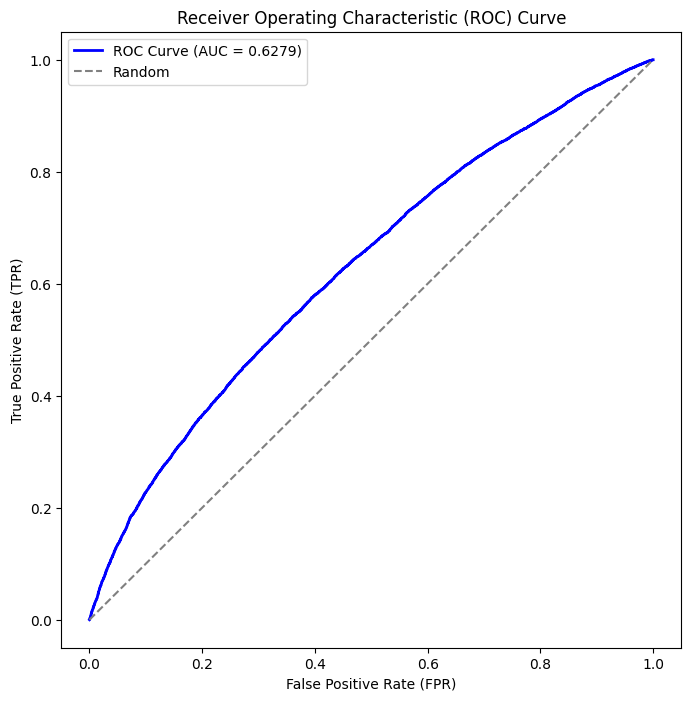

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Assuming you have y_test1, test_pred, and thresholds defined
# Replace this with your actual data

# Create a DataFrame with actual labels and predicted probabilities
df_predictions = pd.DataFrame({'Actual_Label': y_test1, 'Predicted_Probability': test_pred[:, 1]})

# Add a column for predicted labels based on a specific threshold (you can adjust this threshold)
threshold = 0.5
df_predictions['Predicted_Label'] = (df_predictions['Predicted_Probability'] > threshold).astype(int)

# Display the DataFrame
print(df_predictions.head())

# Optionally, you can save the DataFrame to a CSV file
df_predictions.to_csv('predictions_dataframe.csv', index=False)


        Actual_Label  Predicted_Probability  Predicted_Label
8976               0               0.280396                0
76007              1               0.633223                1
77677              1               0.487634                0
209438             1               0.517468                1
143261             0               0.560641                1
